# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
#import appropriate libraries

In [2]:
df_merge = pd.read_csv(r'C:\Users\boudl\Firearm Education Project\02 Data\Prepared Data\firearmcensus_merge.csv')
#import firearms and census dataset

# 01. Data Study: Unsupervised Machine Learning

## A. Elbow Method

In [4]:
df_merge.columns
#display column names of dataset

Index(['Unnamed: 0', 'State', 'F Year', 'f Gender', 'ICD-10 113 Cause List',
       'F Under 5 years', 'F 5-9 years', 'F 10-14 years', 'F 15-19 years',
       'F 20-24 years', 'F 25-29 years', 'F 30-34 years', 'F 35-39 years',
       'F 40-44 years', 'F 45-49 years', 'F 50-54 years', 'F 55-59 years',
       'F 60-64 years', 'F 65-69 years', 'F 70-74 years', 'F 75-79 years',
       'F 80-84 years', 'F 85years and older', 'F Not Stated', 'C Year',
       'C Total population', 'C Male Total population',
       'C Female Total population', 'C Under 5 years', 'C 5 to 9 years',
       'C 10 to 14 years', 'C 15 to 19 years', 'C 20 to 24 years',
       'C 25 to 29 years', 'C 30 to 34 years', 'C 35 to 39 years',
       'C 40 to 44 years', 'C 45 to 49 years', 'C 50 to 54 years',
       'C 55 to 59 years', 'C 60 to 64 years', 'C 65 to 69 years',
       'C 70 to 74 years', 'C 75 to 79 years', 'C 80 to 84 years',
       'C 85 years and over', 'Total Deaths'],
      dtype='object')

In [31]:
df_merge.shape
#display dataframe shape

(2754, 48)

In [6]:
df_merge = df_merge.drop(columns = ['State', 'F Year'])
#drop unneeded columns and define dataframe

In [11]:
df_merge['Total Homicides'] = 0
df_merge['Total Suicides'] = 0
#all new columns for homicide and suicide deaths

In [12]:
homicide_filter = df_merge['ICD-10 113 Cause List'] == 'Homicide'
df_merge.loc[homicide_filter, 'Total Homicides'] = df_merge[homicide_filter].filter(regex='^F').sum(axis=1)
#filter and sum homicide counts, update dataframe with changes

In [16]:
suicide_filter = df_merge['ICD-10 113 Cause List'] == 'Suicide'
df_merge.loc[suicide_filter, 'Total Suicides'] = df_merge.loc[suicide_filter].filter(regex='^F').sum(axis=1)
#filter and sum suicide counts, update dataframe with changes

In [21]:
df_clustering = df_merge[['Total Homicides', 'Total Suicides']]
#extract columns for study

In [18]:
num_cl = range(1, 10) #define range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] #define k means in clusters

Following the online text and using a range of 1 through 10 seems appropriate, given our datset has a large group of 0 values and the remaining dataset values can be grouped in this 1 to 10 range. 

In [25]:
score = [kmeans[i].fit(df_clustering).score(df_clustering) for i in range(len(kmeans))]
print(score)
#fit model and calculate score for each k cluster

C:\Users\boudl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\boudl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\boudl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\boudl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-135730572.7944809, -68291586.9992978, -40756400.82297564, -19661792.71772106, -12507179.311521742, -8028970.623230398, -6186778.717776239, -4530157.285904897, -3471140.2604766977]


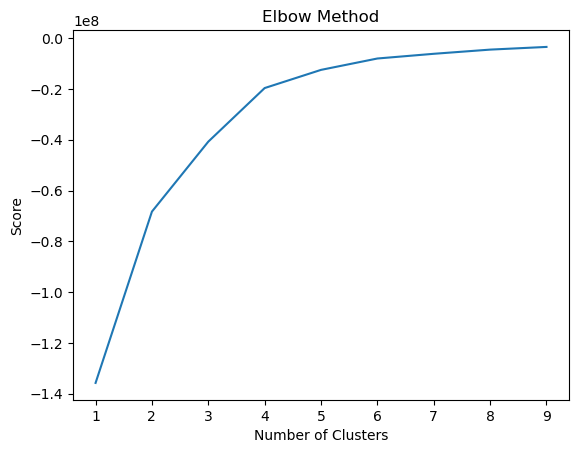

In [23]:
plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()
#plot k scores to find elbow

Since there are two noticeable elbow points at 2 and 4, my analysis will explore a 2 point since there are two primary focuses in this project: the count of total homicide and total suicide deaths by firearms and the significance of their differences.

# 02. Data Visualizations

## A. Scatterplot

C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

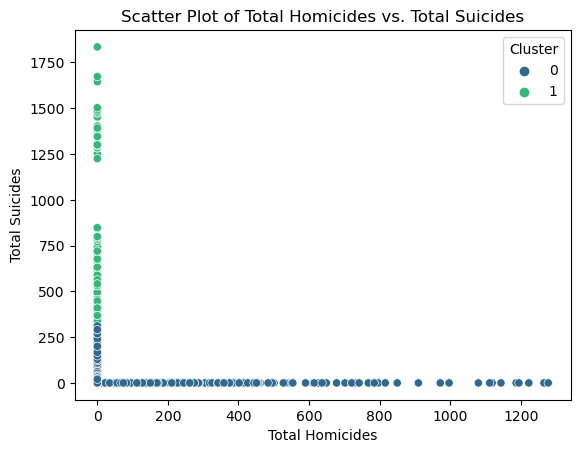

In [35]:
sns.scatterplot(data=df_merge, x='Total Homicides', y='Total Suicides', hue='Cluster', palette='viridis')
plt.title('Scatter Plot of Total Homicides vs. Total Suicides')
plt.show()
#create scatterplot to isplay total homicide and total suicides

For the purpose of study, I attempted to do a cluster based scatterplot, and recieved an interesting result. Since this is a smaller dataset and I opted not to change all the 0 values, this dataset still has a large handful of 0s. The output display of this cluster chart tells me a few things, and could mean that this data is not suited for a cluster analysis.

# 02. Cluster Data Analysis

In [40]:
cluster_groups = df_merge.groupby('Cluster')
#group the cluster column of data

In [41]:
descriptive_stats = cluster_groups[['Total Homicides', 'Total Suicides']].agg(['mean', 'std', 'min', 'max', 'count'])
print(descriptive_stats)
#calculate and display descriptive statistics of this column

        Total Homicides                             Total Suicides  \
                   mean         std min   max count           mean   
Cluster                                                              
0             34.326803  123.459475   0  1278  2552      15.108542   
1              0.000000    0.000000   0     0   202     614.361386   

                                      
                std  min   max count  
Cluster                               
0         50.290458    0   311  2552  
1        337.954166  318  1835   202  


In Cluster 0, total homicides has a mean of 34.33 which suicides onlys has a mean of 15.11, meaning there is a moderate number of homicides compared to suicides. In Cluster 1, total homicides does not have a mean, as the value is 0, indicaing there are no homicides. Suicides has a mean of 614.36 and thus skews this cluster's output